In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import datetime
import matplotlib.dates as mdates

In [3]:
# Loads timeseries data from a file, parsing the x values as dates.
def get_timeseries(file):
    X, Y = [], []
    for line in open(file, 'r'):
        values = [float(s) for s in line.split()]
        X.append(
            datetime.datetime.now() + datetime.timedelta(seconds=values[0])
        )
        Y.append(values[1])
    return X, Y

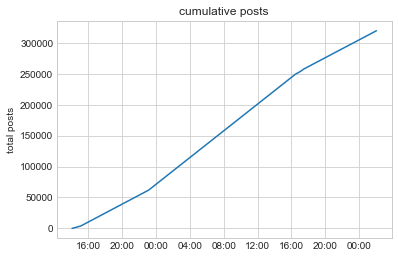

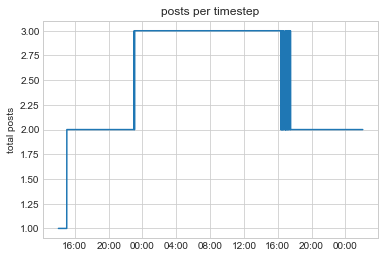

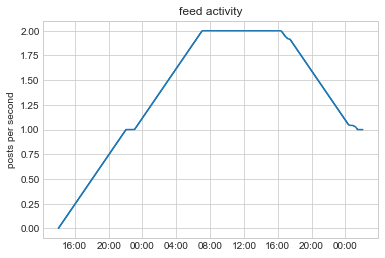

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

date_formatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_formatter)
ax.set_ylabel('total posts')

plt.title('cumulative posts')
plt.plot(*get_timeseries('./data/cumulativePosts.txt'))
plt.show()



fig = plt.figure()
ax = fig.add_subplot(111)

date_formatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_formatter)
ax.set_ylabel('total posts')

plt.title('posts per timestep')
plt.plot(*get_timeseries('./data/postsAtTime.txt'))
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)

date_formatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_formatter)
ax.set_ylabel('posts per second')

plt.title('feed activity')
plt.plot(*get_timeseries('./data/feedActivityData.txt'))
plt.show()

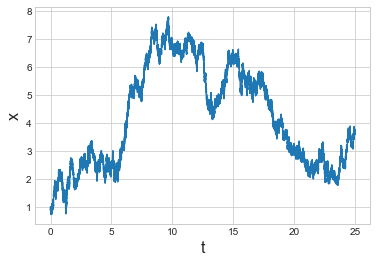

In [79]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out


# The Wiener process parameter.
delta = 1
# Total time.
T = 25.0
# Number of steps.
N = 36 * 60 * 60 - 1
# Time step size
dt = T/N
# Number of realizations to generate.
m = 1
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 1

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

JS_NUMBER_FORMAT = '%g'
numpy.savetxt('./out/brownian.txt', x, fmt=JS_NUMBER_FORMAT)
